In [51]:
# !pip install Pillow -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip install pandas -i https://pypi.tuna.tsinghua.edu.cn/simple

In [109]:
import whisper

import sys
sys.path.append("../../cuhksz-phd/sho_util/pyfiles/")
from basic import plot_spectrogram

In [2]:
model = whisper.load_model("large")

In [89]:
fs = 16000
path = "/mntcephfs/lab_data/shoinoue/Dataset/L2-ARCTIC/HKK/wav/arctic_a0001.wav"
# path = "/mntcephfs/lab_data/shoinoue/Dataset/L2-ARCTIC/HKK/wav/arctic_a0004.wav"

In [103]:
import numpy as np

In [105]:
np.load("/mntcephfs/lab_data/shoinoue/Dataset/LibriTTS_R/features/dev-clean/1272/128104/1272_128104_000001_000000_wavlm.npy").shape

(1024, 73)

In [113]:
class WhisperExtractor():
    def __init__(self, fs=16000, device="cuda"):
        self.fs = fs
        model = whisper.load_model("large")
        self.model = model.to(device)
        self.device = device
    
    def get_feature(self, path):
        # (#features, time)
        gtaudio = whisper.load_audio(path)
        audio = whisper.pad_or_trim(gtaudio)
        mel = whisper.log_mel_spectrogram(audio, n_mels=128).to(self.model.device)
        options = whisper.DecodingOptions()
        result = whisper.decode(self.model, mel, options)
        features = result.audio_features.detach().cpu().numpy()
        return features[:, :int(len(gtaudio)/self.fs/30*features.shape[1])]

In [118]:
mel.shape

torch.Size([128, 3000])

In [114]:
model = WhisperExtractor()

In [117]:
model.get_feature(path).shape

(1500, 153)

In [90]:
# load audio and pad/trim it to fit 30 seconds
gtaudio = whisper.load_audio(path)
audio = whisper.pad_or_trim(gtaudio)
mel = whisper.log_mel_spectrogram(audio, n_mels=128).to(model.device)
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

Detected language: en


In [120]:
features.shape

(1500, 1280)

In [91]:
int(len(gtaudio)/fs/30*mel.shape[1])

359

In [95]:
features = result.audio_features.detach().cpu().numpy()
features[:, :int(len(gtaudio)/fs/30*features.shape[1])]

array([[-0.611   ,  0.331   ,  0.4602  , ...,  0.1927  , -0.315   ,
         0.166   ],
       [-0.1034  ,  0.4473  , -0.2152  , ...,  0.1536  ,  2.518   ,
        -0.1838  ],
       [-0.3596  ,  0.4468  ,  0.324   , ...,  0.009155,  3.002   ,
        -0.7188  ],
       ...,
       [-0.467   , -0.3557  , -0.1216  , ..., -0.4934  ,  2.662   ,
         0.4453  ],
       [-0.0318  , -0.4954  , -0.2769  , ..., -0.702   ,  0.6636  ,
         0.345   ],
       [ 0.026   ,  0.1948  , -0.409   , ..., -0.727   , -0.1593  ,
         0.659   ]], dtype=float16)

In [121]:
mel.cpu().numpy()[:, :int(len(gtaudio)/fs/30*mel.shape[1])].shape

(128, 359)

<Axes: >

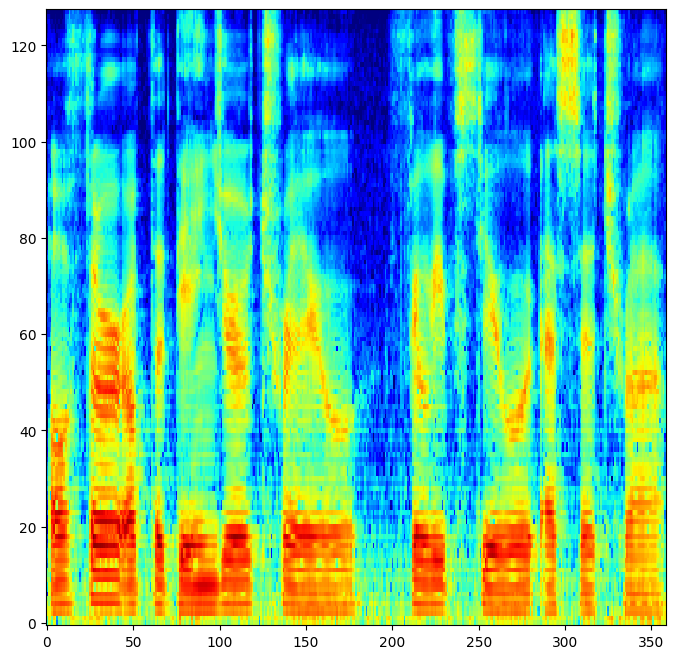

In [97]:
plot_spectrogram(mel.cpu().numpy()[:, :int(len(gtaudio)/fs/30*mel.shape[1])])

In [31]:
result.audio_features.shape

torch.Size([1500, 1280])

In [28]:
mel.shape

torch.Size([128, 3000])

In [27]:
result.audio_features.shape

torch.Size([1500, 1280])

In [24]:
result

DecodingResult(audio_features=tensor([[-0.6108,  0.3311,  0.4602,  ..., -0.0155, -0.5767,  0.0097],
        [-0.1034,  0.4473, -0.2152,  ..., -0.0378, -0.3386,  0.6230],
        [-0.3596,  0.4468,  0.3240,  ..., -0.7949, -0.4619, -0.5322],
        ...,
        [-0.4670, -0.3557, -0.1216,  ..., -0.1262,  0.0274,  0.5469],
        [-0.0318, -0.4954, -0.2769,  ...,  0.0687,  0.1721, -0.8818],
        [ 0.0260,  0.1948, -0.4089,  ...,  0.0126,  0.3257, -0.0067]],
       device='cuda:0', dtype=torch.float16), language='en', language_probs=None, tokens=[50365, 20216, 295, 440, 36619, 30080, 11, 21144, 8291, 11, 5183, 13, 50545], text='Author of The Danger Trail, Philip Still, etc.', avg_logprob=-0.259576610156468, no_speech_prob=0.006529183592647314, temperature=0.0, compression_ratio=0.8846153846153846)

In [6]:
result

{'text': ' Author of The Danger Trail, Philip Still, etc.',
 'segments': [{'id': 0,
   'seek': 0,
   'start': 0.0,
   'end': 3.6,
   'text': ' Author of The Danger Trail, Philip Still, etc.',
   'tokens': [50365,
    20216,
    295,
    440,
    36619,
    30080,
    11,
    21144,
    8291,
    11,
    5183,
    13,
    50545],
   'temperature': 0.0,
   'avg_logprob': -0.259576610156468,
   'compression_ratio': 0.8846153846153846,
   'no_speech_prob': 0.006529183592647314}],
 'language': 'en'}

In [1]:
import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import librosa

import soundfile as sf
import fairseq

# import sys
# sys.path.append("../../cuhksz-phd/sho_util/pyfiles/")
# from sound import play_audio

2024-07-12 20:52:31 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


In [3]:
state = torch.load(ckpt_path)

In [4]:
def read_audio(fname, fs=16000):
    """ Load an audio file and return PCM along with the sample rate """

    wav, sr = sf.read(fname)
    if sr!=fs:
        wav, _ = librosa.load(fname, fs)
        sf.write("temp.wav", wav, fs, subtype="PCM_24") # 書き込み
        wav, sr = sf.read("temp.wav")
    assert sr == fs

    return wav, fs

In [10]:
state["args"]

In [8]:
state = fairseq.checkpoint_utils.load_checkpoint_to_cpu(ckpt_path, None)

AttributeError: 'NoneType' object has no attribute 'task'

In [4]:
class PretrainedWav2VecModel(nn.Module):
    def __init__(self, fname):
        super().__init__()

        model, cfg, task = fairseq.checkpoint_utils.load_model_ensemble_and_task([fname])
        model = model[0]
        model.eval()

        self.model = model

    def forward(self, x):
        with torch.no_grad():
            z = self.model.feature_extractor(x)
            if isinstance(z, tuple):
                z = z[0]
            c = self.model.feature_aggregator(z)
        return z, c
    
class Prediction:
    """ Lightweight wrapper around a fairspeech embedding model """

    def __init__(self, fname, gpu=0):
        self.gpu = gpu
        self.model = PretrainedWav2VecModel(fname).cuda(gpu)

    def __call__(self, x):
        x = torch.from_numpy(x).float().cuda(self.gpu)
        with torch.no_grad():
            z, c = self.model(x.unsqueeze(0))

        return z.squeeze(0).cpu().numpy(), c.squeeze(0).cpu().numpy()

In [5]:
model = Prediction(ckpt_path, 0)
wav, sr = read_audio(path)

AttributeError: 'NoneType' object has no attribute 'task'

In [ ]:
z, c = model(wav)